<a href="https://colab.research.google.com/github/Justy-11/Analysis-of-Transfer-Learning-for-Image-Classification-on-Sparse-Data/blob/main/IRP_Model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import pickle
import time
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd
from sklearn.utils.class_weight import compute_sample_weight
import shutil

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# columns = ['Model', 'Dataset', 'Sample size', 'DA', 'FT', 'Epochs', 'Time', 'Test acc', 'F1', 'Precision', 'Recall']

# # Save the DataFrame to an Excel file
# excel_path = '/content/drive/MyDrive/datasets/training_data.xlsx'

# # Check if the Excel file already exists
# if os.path.exists(excel_path):
#     # Load existing DataFrame from the file
#     df = pd.read_excel(excel_path)
# else:
#     # Create an empty DataFrame with columns
#     df = pd.DataFrame(columns=columns)
#     # Save the DataFrame to an Excel file
#     df.to_excel(excel_path, index=False)
#     print(f"Excel file created at: {excel_path}")

In [ ]:
def update_sheet(excel_path, model, dataset, sample_size, da, ft, epochs, training_time, test_acc, f1, precision, recall):
    # Load the existing DataFrame from the Excel file
    df = pd.read_excel(excel_path)

    # Create a new DataFrame with the new data
    new_data = {
        'Model': [model],
        'Dataset': [dataset],
        'Sample size': [sample_size],
        'DA': [da],
        'FT': [ft],
        'Epochs': [epochs],
        'Time': [training_time],
        'Test acc': [test_acc],
        'F1': [f1],
        'Precision': [precision],
        'Recall': [recall]
    }

    new_df = pd.DataFrame(new_data)

    # Concatenate the existing DataFrame and the new DataFrame
    df = pd.concat([df, new_df], ignore_index=True)

    # Save the updated DataFrame to the Excel file
    df.to_excel(excel_path, index=False)

    print(f"Excel file updated at: {excel_path}")

In [ ]:
# load data - skin disease
save_dir_test = '/content/drive/MyDrive/datasets/Split_smol/samples/test_set/'
save_dir_sample3 = '/content/drive/MyDrive/datasets/Split_smol/samples/sample3/'
save_dir_sample2 = '/content/drive/MyDrive/datasets/Split_smol/samples/sample2/'
save_dir_sample1 = '/content/drive/MyDrive/datasets/Split_smol/samples/sample1/'

# common test set
# X_test = np.load(save_dir_test + 'X_test.npy')
# y_test = np.load(save_dir_test + 'y_test.npy')

# X_train_3 = np.load(save_dir_sample3 + 'X_train.npy')
# X_val_3 = np.load(save_dir_sample3 + 'X_val.npy')
# y_train_3 = np.load(save_dir_sample3 + 'y_train.npy')
# y_val_3 = np.load(save_dir_sample3 + 'y_val.npy')

# # load data - waste classification
# save_dir_test = '/content/drive/MyDrive/datasets/waste_classification/sample/test_set/'
# save_dir_sample3 = '/content/drive/MyDrive/datasets/waste_classification/sample/sample3/'
# save_dir_sample2 = '/content/drive/MyDrive/datasets/waste_classification/sample/sample2/'
# save_dir_sample1 = '/content/drive/MyDrive/datasets/waste_classification/sample/sample1/'

# # common test set
X_test = np.load(save_dir_test + 'X_test.npy')
y_test = np.load(save_dir_test + 'y_test.npy')

X_train_3 = np.load(save_dir_sample3 + 'X_train.npy')
X_val_3 = np.load(save_dir_sample3 + 'X_val.npy')
y_train_3 = np.load(save_dir_sample3 + 'y_train.npy')
y_val_3 = np.load(save_dir_sample3 + 'y_val.npy')

In [ ]:
X_train_2 = np.load(save_dir_sample2 + 'X_train.npy')
X_val_2 = np.load(save_dir_sample2 + 'X_val.npy')
y_train_2 = np.load(save_dir_sample2 + 'y_train.npy')
y_val_2 = np.load(save_dir_sample2 + 'y_val.npy')

In [ ]:
X_train_1 = np.load(save_dir_sample1 + 'X_train.npy')
X_val_1 = np.load(save_dir_sample1 + 'X_val.npy')
y_train_1 = np.load(save_dir_sample1 + 'y_train.npy')
y_val_1 = np.load(save_dir_sample1 + 'y_val.npy')

In [ ]:
# load augmented data
save_dir_DA3 = '/content/drive/MyDrive/datasets/Split_smol/DA_2/sample3/'
save_dir_DA2 = '/content/drive/MyDrive/datasets/Split_smol/DA_2/sample2/'
save_dir_DA1 = '/content/drive/MyDrive/datasets/Split_smol/DA_2/sample1/'

X_train_3_DA = np.load(save_dir_DA3 + 'X_train.npy')
y_train_3_DA = np.load(save_dir_DA3 + 'y_train.npy')
X_train_2_DA = np.load(save_dir_DA2 + 'X_train.npy')
y_train_2_DA = np.load(save_dir_DA2 + 'y_train.npy')
X_train_1_DA = np.load(save_dir_DA1 + 'X_train.npy')
y_train_1_DA = np.load(save_dir_DA1 + 'y_train.npy')

# # load augmented data
# save_dir_DA3 = '/content/drive/MyDrive/datasets/waste_classification/DA/sample3/'
# save_dir_DA2 = '/content/drive/MyDrive/datasets/waste_classification/DA/sample2/'
# save_dir_DA1 = '/content/drive/MyDrive/datasets/waste_classification/DA/sample1/'

# X_train_3_DA = np.load(save_dir_DA3 + 'X_train.npy')
# y_train_3_DA = np.load(save_dir_DA3 + 'y_train.npy')
# X_train_2_DA = np.load(save_dir_DA2 + 'X_train.npy')
# y_train_2_DA = np.load(save_dir_DA2 + 'y_train.npy')
# X_train_1_DA = np.load(save_dir_DA1 + 'X_train.npy')
# y_train_1_DA = np.load(save_dir_DA1 + 'y_train.npy')

In [ ]:
# # load data - grape disease
# save_dir_test = '/content/drive/MyDrive/datasets/Grape400/samples/test_set/'
# save_dir_sample3 = '/content/drive/MyDrive/datasets/Grape400/samples/sample3/'
# save_dir_sample2 = '/content/drive/MyDrive/datasets/Grape400/samples/sample2/'
# save_dir_sample1 = '/content/drive/MyDrive/datasets/Grape400/samples/sample1/'

# # common test set
# X_test = np.load(save_dir_test + 'X_test.npy')
# y_test = np.load(save_dir_test + 'y_test.npy')

# X_train_3 = np.load(save_dir_sample3 + 'X_train.npy')
# X_val_3 = np.load(save_dir_sample3 + 'X_val.npy')
# y_train_3 = np.load(save_dir_sample3 + 'y_train.npy')
# y_val_3 = np.load(save_dir_sample3 + 'y_val.npy')

# X_train_2 = np.load(save_dir_sample2 + 'X_train.npy')
# X_val_2 = np.load(save_dir_sample2 + 'X_val.npy')
# y_train_2 = np.load(save_dir_sample2 + 'y_train.npy')
# y_val_2 = np.load(save_dir_sample2 + 'y_val.npy')

# X_train_1 = np.load(save_dir_sample1 + 'X_train.npy')
# X_val_1 = np.load(save_dir_sample1 + 'X_val.npy')
# y_train_1 = np.load(save_dir_sample1 + 'y_train.npy')
# y_val_1 = np.load(save_dir_sample1 + 'y_val.npy')

In [ ]:
# # load augmented data - grape disease
# save_dir_DA3 = '/content/drive/MyDrive/datasets/Grape400/DA/sample3/'
# save_dir_DA2 = '/content/drive/MyDrive/datasets/Grape400/DA/sample2/'
# save_dir_DA1 = '/content/drive/MyDrive/datasets/Grape400/DA/sample1/'

# X_train_3_DA = np.load(save_dir_DA3 + 'X_train.npy')
# y_train_3_DA = np.load(save_dir_DA3 + 'y_train.npy')
# X_train_2_DA = np.load(save_dir_DA2 + 'X_train.npy')
# y_train_2_DA = np.load(save_dir_DA2 + 'y_train.npy')
# X_train_1_DA = np.load(save_dir_DA1 + 'X_train.npy')
# y_train_1_DA = np.load(save_dir_DA1 + 'y_train.npy')

In [ ]:
X_train_3.shape, X_val_3.shape, X_train_2.shape, X_val_2.shape, X_train_1.shape, X_val_1.shape

((87, 224, 224, 3),
 (19, 224, 224, 3),
 (175, 224, 224, 3),
 (38, 224, 224, 3),
 (351, 224, 224, 3),
 (75, 224, 224, 3))

In [ ]:
X_train_3_DA.shape, X_train_2_DA.shape, X_train_1_DA.shape

((174, 224, 224, 3), (350, 224, 224, 3), (702, 224, 224, 3))

In [ ]:
def preprocess_and_train(model_name, X_train, X_val, y_train, y_val, num_classes, activation, loss, dropout_rate):

  start_time = time.time()

  if model_name == 'efB0':
    X_train_preprocessed = tf.keras.applications.efficientnet.preprocess_input(X_train)
    X_val_preprocessed = tf.keras.applications.efficientnet.preprocess_input(X_val)

    model = tf.keras.applications.efficientnet.EfficientNetB0()

  else:
    X_train_preprocessed = tf.keras.applications.mobilenet_v2.preprocess_input(X_train)
    X_val_preprocessed = tf.keras.applications.mobilenet_v2.preprocess_input(X_val)

    model = tf.keras.applications.mobilenet_v2.MobileNetV2()

  # one hot encode the integer
  if num_classes > 2:
    y_train = to_categorical(y_train, num_classes)
    y_val = to_categorical(y_val, num_classes)
  if num_classes == 2:
    num_classes = num_classes - 1

  for layer in model.layers:
    layer.trainable = False

  base_input = model.layers[0].input
  base_output = model.layers[-2].output

  dropout_layer = tf.keras.layers.Dropout(rate=dropout_rate)(base_output)

  # Replace the last classification layer
  predictions = tf.keras.layers.Dense(num_classes, activation=activation)(dropout_layer)

  # Create the modified model
  created_model = tf.keras.Model(inputs=base_input, outputs=predictions)

  # Compile and train the model
  # Use the ReduceLROnPlateau learning rate scheduler
  lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=1e-6,
        verbose=1)

  early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True)

  created_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                                   loss=loss,
                                   metrics=['accuracy'])

  history_of_model = created_model.fit(
                               X_train_preprocessed,
                               y_train,
                               epochs=50,
                               batch_size=32,
                               validation_data=(X_val_preprocessed, y_val),
                               callbacks=[early_stopping, lr_scheduler])


  end_time = time.time()
  training_time = end_time - start_time

  num_epochs_taken = len(history_of_model.history['loss'])
  # print("Number of epochs:", num_epochs)

  return created_model, history_of_model, training_time, num_epochs_taken

In [ ]:
def evaluate_model(model_name, X_test, y_test, model, history_of_model, num_classes):
  if model_name == 'efB0':
    X_test_preprocessed = tf.keras.applications.efficientnet.preprocess_input(X_test)

  else:
    X_test_preprocessed = tf.keras.applications.mobilenet_v2.preprocess_input(X_test)

  if num_classes > 2:
    y_test_encoded = to_categorical(y_test, num_classes)
    test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded)
  if num_classes == 2:
    test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test)

  y_pred = model.predict(X_test_preprocessed)

  if num_classes > 2:
    y_pred_binary = np.argmax(y_pred, axis=1)
  if num_classes == 2:
    y_pred_binary = (y_pred >= 0.5).astype(int)

  # create confusion matrix
  conf_matrix = confusion_matrix(y_test, y_pred_binary)
  # Create a heatmap of the confusion matrix using seaborn
  plt.figure(figsize=(4, 3))
  sns.set(font_scale=1.0)
  sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')
  plt.show()

  class_report = classification_report(y_test, y_pred_binary, digits=4)
  print(class_report)

  precision = precision_score(y_test, y_pred_binary, average='macro', zero_division=0)
  recall = recall_score(y_test, y_pred_binary, average='macro', zero_division=0)
  f1 = f1_score(y_test, y_pred_binary, average='macro', zero_division=0)

  return test_loss, test_accuracy, precision, recall, f1

In [ ]:
def save_model_and_history(model, history_of_model, model_name, dataset_name, sample_size, data_augmentation, fine_tuning, save_dir='/content/drive/MyDrive/datasets/models/'):

    # Create a string representation of da and ft
    da_str = '1' if data_augmentation else '0'
    ft_str = '1' if fine_tuning else '0'

    # Generate filenames
    model_filename = f'{model_name}_{dataset_name}_{sample_size}_{da_str}_{ft_str}.h5'
    history_filename = f'{model_name}_{dataset_name}_{sample_size}_{da_str}_{ft_str}_history.pkl'

    # Save the model
    model_save_path = os.path.join(save_dir, model_filename)
    model.save(model_save_path)

    # Save the training history to a pickle file
    history_save_path = os.path.join(save_dir, history_filename)
    with open(history_save_path, 'wb') as file:
      pickle.dump(history_of_model.history, file)

    print(f"Training history saved at: {history_save_path}")

In [ ]:
def preprocess_and_train_with_FT(model_name, X_train, X_val, y_train, y_val, num_classes, activation, loss, dropout_rate):

  start_time = time.time()

  if model_name == 'efB0':
    X_train_preprocessed = tf.keras.applications.efficientnet.preprocess_input(X_train)
    X_val_preprocessed = tf.keras.applications.efficientnet.preprocess_input(X_val)

    model = tf.keras.applications.efficientnet.EfficientNetB0()

  else:
    X_train_preprocessed = tf.keras.applications.mobilenet_v2.preprocess_input(X_train)
    X_val_preprocessed = tf.keras.applications.mobilenet_v2.preprocess_input(X_val)

    model = tf.keras.applications.mobilenet_v2.MobileNetV2()

  # one hot encode the integer
  if num_classes > 2:
    y_train = to_categorical(y_train, num_classes)
    y_val = to_categorical(y_val, num_classes)
  if num_classes == 2:
    num_classes = num_classes - 1

  for layer in model.layers:
    layer.trainable = True

  # print(len(model.layers))

  base_input = model.layers[0].input
  base_output = model.layers[-2].output

  dropout_layer = tf.keras.layers.Dropout(rate=dropout_rate)(base_output)

  # Replace the last classification layer
  predictions = tf.keras.layers.Dense(num_classes, activation=activation)(dropout_layer)

  # Create the modified model
  created_model = tf.keras.Model(inputs=base_input, outputs=predictions)

  # Compile and train the model
  # Use the ReduceLROnPlateau learning rate scheduler
  lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=1e-6,
        verbose=1)

  early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True)

  created_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003),
                                   loss=loss,
                                   metrics=['accuracy'])

  history_of_model = created_model.fit(
                               X_train_preprocessed,
                               y_train,
                               epochs=50,
                               batch_size=32,
                               validation_data=(X_val_preprocessed, y_val),
                               callbacks=[early_stopping, lr_scheduler])


  end_time = time.time()
  training_time = end_time - start_time

  num_epochs_taken = len(history_of_model.history['loss'])
  # print("Number of epochs:", num_epochs)

  return created_model, history_of_model, training_time, num_epochs_taken

In [ ]:
# binary classification
# model, history_of_model, training_time, epochs_taken = preprocess_and_train('mobV2', X_train_1, X_val_1, y_train_1, y_val_1, 2, 'sigmoid', 'binary_crossentropy', 0.6)

# binary with DA
# model, history_of_model, training_time, epochs_taken = preprocess_and_train_with_FT('mobV2', X_train__DA, X_val_1, y_train_1_DA, y_val_1, 2, 'sigmoid', 'binary_crossentropy', 0.6)

# multiclass classification
# model, history_of_model, training_time, epochs_taken = preprocess_and_train('efB0', X_train_3, X_val_3, y_train_3, y_val_3, 5, 'softmax', 'categorical_crossentropy', 0.6)
# model, history_of_model, training_time, epochs_taken = preprocess_and_train('efB0', X_train_2, X_val_2, y_train_2, y_val_2, 5, 'softmax', 'categorical_crossentropy', 0.6)
# model, history_of_model, training_time, epochs_taken = preprocess_and_train('efB0', X_train_1, X_val_1, y_train_1, y_val_1, 5, 'softmax', 'categorical_crossentropy', 0.6)

# multiclass classification with DA
model, history_of_model, training_time, epochs_taken = preprocess_and_train_with_FT('mobV2', X_train_3_DA, X_val_3, y_train_3_DA, y_val_3, 5, 'softmax', 'categorical_crossentropy', 0.6)
# with FT
# model, history_of_model, training_time, epochs_taken = preprocess_and_train_with_FT('mobV2', X_train_1, X_val_1, y_train_1, y_val_1, 5, 'softmax', 'categorical_crossentropy', 0.6)
# model, history_of_model, training_time, epochs_taken = preprocess_and_train_with_FT('mobV2', X_train_1, X_val_1, y_train_1, y_val_1, 2, 'sigmoid', 'binary_crossentropy', 0.6)
# model, history_of_model, training_time, epochs_taken = preprocess_and_train_with_FT('efB0', X_train_1, X_val_1, y_train_1, y_val_1, 5, 'softmax', 'categorical_crossentropy', 0.6)

14536120/14536120 [==============================] - 0s 0us/step
Epoch 1/50


KeyboardInterrupt: ignored

3/3 [==============================] - 4s 935ms/step


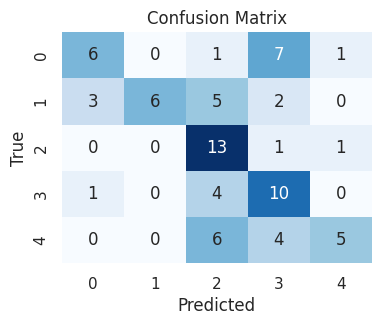

              precision    recall  f1-score   support

           0     0.6000    0.4000    0.4800        15
           1     1.0000    0.3750    0.5455        16
           2     0.4483    0.8667    0.5909        15
           3     0.4167    0.6667    0.5128        15
           4     0.7143    0.3333    0.4545        15

    accuracy                         0.5263        76
   macro avg     0.6358    0.5283    0.5167        76
weighted avg     0.6406    0.5263    0.5171        76



In [ ]:
# test_loss, test_accuracy, precision, recall, f1 = evaluate_model('mobV2', X_test, y_test, model, history_of_model, 2)
test_loss, test_accuracy, precision, recall, f1 = evaluate_model('mobV2', X_test, y_test, model, history_of_model, 5)

In [ ]:
training_loss = history_of_model.history['loss']
validation_loss = history_of_model.history['val_loss']

training_accuracy = history_of_model.history['accuracy']
validation_accuracy = history_of_model.history['val_accuracy']

epochs = range(1, len(training_loss) + 1)

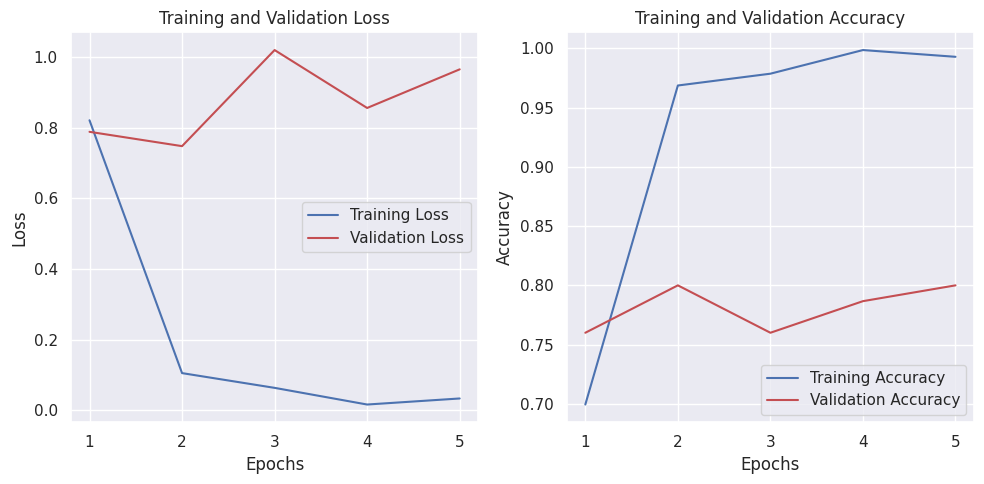

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, training_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
test_loss, test_accuracy, precision, recall, f1

(0.9174677133560181,
 0.6842105388641357,
 0.7918773946360154,
 0.6808333333333334,
 0.6732740649277151)

In [ ]:
# update training data to excel sheet
update_sheet('/content/drive/MyDrive/datasets/training_data.xlsx', 'mobV2', 'SD', 'L', True, True, epochs_taken, training_time, test_accuracy, f1, precision, recall)

Excel file updated at: /content/drive/MyDrive/datasets/training_data.xlsx


In [ ]:
# save model and history, default save dir ='/content/drive/MyDrive/datasets/Split_smol/models/'
save_model_and_history(model, history_of_model, 'mobV2', 'SD', 'L', True, True)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Training history saved at: /content/drive/MyDrive/datasets/models/mobV2_SD_L_1_1_history.pkl


In [ ]:
# after updating delete it
del model
del history_of_model
del training_time
del epochs_taken

NameError: ignored

In [ ]:
del test_loss
del test_accuracy
del precision
del recall
del f1

In [ ]:
print(tf.test.gpu_device_name())

/device:GPU:0


In [ ]:
def preprocess_and_train_LS(model_name, X_train, X_val, y_train, y_val, num_classes, activation, loss, dropout_rate):


  start_time = time.time()

  if model_name == 'efB5':
    X_train_preprocessed = tf.keras.applications.efficientnet.preprocess_input(X_train)
    X_val_preprocessed = tf.keras.applications.efficientnet.preprocess_input(X_val)

    X_train_preprocessed = tf.image.resize(X_train_preprocessed, (456, 456))
    X_val_preprocessed = tf.image.resize(X_val_preprocessed, (456, 456))

    model = tf.keras.applications.efficientnet.EfficientNetB5()

  else:
    X_train_preprocessed = tf.keras.applications.mobilenet_v3.preprocess_input(X_train)
    X_val_preprocessed =  tf.keras.applications.mobilenet_v3.preprocess_input(X_val)

    model = tf.keras.applications.MobileNetV3Large(input_shape=(224, 224, 3))

  # one hot encode the integer
  if num_classes > 2:
    y_train = to_categorical(y_train, num_classes)
    y_val = to_categorical(y_val, num_classes)
  if num_classes == 2:
    num_classes = num_classes - 1

  for layer in model.layers:
    layer.trainable = True

  base_input = model.layers[0].input
  base_output = model.layers[-2].output

  dropout_layer = tf.keras.layers.Dropout(rate=dropout_rate)(base_output)

  # Replace the last classification layer
  predictions = tf.keras.layers.Dense(num_classes, activation=activation)(dropout_layer)

  # Create the modified model
  created_model = tf.keras.Model(inputs=base_input, outputs=predictions)

  # Compile and train the model
  # Use the ReduceLROnPlateau learning rate scheduler
  lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=1e-6,
        verbose=1)

  early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True)

  created_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                                   loss=loss,
                                   metrics=['accuracy'])

  history_of_model = created_model.fit(
                               X_train_preprocessed,
                               y_train,
                               epochs=50,
                               batch_size=8,
                               validation_data=(X_val_preprocessed, y_val),
                               callbacks=[early_stopping, lr_scheduler])


  end_time = time.time()
  training_time = end_time - start_time

  num_epochs_taken = len(history_of_model.history['loss'])
  # print("Number of epochs:", num_epochs)

  return created_model, history_of_model, training_time, num_epochs_taken

In [ ]:
def evaluate_model_LS(model_name, X_test, y_test, model, history_of_model, num_classes):
  if model_name == 'efB5':
    X_test_preprocessed = tf.keras.applications.efficientnet.preprocess_input(X_test)
    X_test_preprocessed = tf.image.resize(X_test_preprocessed, (456, 456))

  else:
    X_test_preprocessed = tf.keras.applications.mobilenet_v3.preprocess_input(X_test)

  if num_classes > 2:
    y_test_encoded = to_categorical(y_test, num_classes)
    test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded)
  if num_classes == 2:
    test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test)

  y_pred = model.predict(X_test_preprocessed)

  if num_classes > 2:
    y_pred_binary = np.argmax(y_pred, axis=1)
  if num_classes == 2:
    y_pred_binary = (y_pred >= 0.5).astype(int)

  # create confusion matrix
  conf_matrix = confusion_matrix(y_test, y_pred_binary)
  # Create a heatmap of the confusion matrix using seaborn
  plt.figure(figsize=(4, 3))
  sns.set(font_scale=1.0)
  sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')
  plt.show()

  class_report = classification_report(y_test, y_pred_binary, digits=4)
  print(class_report)

  precision = precision_score(y_test, y_pred_binary, average='macro', zero_division=0)
  recall = recall_score(y_test, y_pred_binary, average='macro', zero_division=0)
  f1 = f1_score(y_test, y_pred_binary, average='macro', zero_division=0)

  return test_loss, test_accuracy, precision, recall, f1

In [ ]:
# binary classification
# model, history_of_model, training_time, epochs_taken = preprocess_and_train('mobV2', X_train_1, X_val_1, y_train_1, y_val_1, 2, 'sigmoid', 'binary_crossentropy', 0.6)

# binary with DA
# model, history_of_model, training_time, epochs_taken = preprocess_and_train_with_FT('mobV2', X_train__DA, X_val_1, y_train_1_DA, y_val_1, 2, 'sigmoid', 'binary_crossentropy', 0.6)

# multiclass classification
# model, history_of_model, training_time, epochs_taken = preprocess_and_train('efB0', X_train_3, X_val_3, y_train_3, y_val_3, 5, 'softmax', 'categorical_crossentropy', 0.6)
# model, history_of_model, training_time, epochs_taken = preprocess_and_train('efB0', X_train_2, X_val_2, y_train_2, y_val_2, 5, 'softmax', 'categorical_crossentropy', 0.6)
# model, history_of_model, training_time, epochs_taken = preprocess_and_train('efB0', X_train_1, X_val_1, y_train_1, y_val_1, 5, 'softmax', 'categorical_crossentropy', 0.6)

# multiclass classification with DA -LS
model, history_of_model, training_time, epochs_taken = preprocess_and_train_LS('efB5', X_train_1_DA, X_val_1, y_train_1_DA, y_val_1, 5, 'softmax', 'categorical_crossentropy', 0.6)
# with FT
# model, history_of_model, training_time, epochs_taken = preprocess_and_train_with_FT('mobV2', X_train_1, X_val_1, y_train_1, y_val_1, 5, 'softmax', 'categorical_crossentropy', 0.6)
# model, history_of_model, training_time, epochs_taken = preprocess_and_train_with_FT('mobV2', X_train_1, X_val_1, y_train_1, y_val_1, 2, 'sigmoid', 'binary_crossentropy', 0.6)
# model, history_of_model, training_time, epochs_taken = preprocess_and_train_with_FT('efB0', X_train_1, X_val_1, y_train_1, y_val_1, 5, 'softmax', 'categorical_crossentropy', 0.6)

123465288/123465288 [==============================] - 1s 0us/step
Epoch 1/50
88/88 [==============================] - 190s 1s/step - loss: 1.0736 - accuracy: 0.6154 - val_loss: 0.8364 - val_accuracy: 0.7200 - lr: 1.0000e-04
Epoch 2/50
88/88 [==============================] - 91s 1s/step - loss: 0.3929 - accuracy: 0.8889 - val_loss: 0.2518 - val_accuracy: 0.9200 - lr: 1.0000e-04
Epoch 3/50
88/88 [==============================] - 91s 1s/step - loss: 0.2413 - accuracy: 0.9330 - val_loss: 0.1219 - val_accuracy: 0.9733 - lr: 1.0000e-04
Epoch 4/50
88/88 [==============================] - 91s 1s/step - loss: 0.1248 - accuracy: 0.9487 - val_loss: 0.1034 - val_accuracy: 0.9867 - lr: 1.0000e-04
Epoch 5/50
88/88 [==============================] - 90s 1s/step - loss: 0.0958 - accuracy: 0.9786 - val_loss: 0.1128 - val_accuracy: 0.9467 - lr: 1.0000e-04
Epoch 6/50
88/88 [==============================] - 91s 1s/step - loss: 0.0966 - accuracy: 0.9744 - val_loss: 0.0837 - val_accuracy: 0.9600 - lr: 1

3/3 [==============================] - 5s 809ms/step


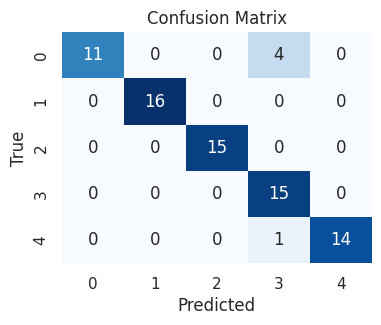

              precision    recall  f1-score   support

           0     1.0000    0.7333    0.8462        15
           1     1.0000    1.0000    1.0000        16
           2     1.0000    1.0000    1.0000        15
           3     0.7500    1.0000    0.8571        15
           4     1.0000    0.9333    0.9655        15

    accuracy                         0.9342        76
   macro avg     0.9500    0.9333    0.9338        76
weighted avg     0.9507    0.9342    0.9346        76



In [ ]:
test_loss, test_accuracy, precision, recall, f1 = evaluate_model_LS('efB5', X_test, y_test, model, history_of_model, 5)

In [ ]:
# update training data to excel sheet
update_sheet('/content/drive/MyDrive/datasets/training_data.xlsx', 'efB5', 'SD', 'L', True, True, epochs_taken, training_time, test_accuracy, f1, precision, recall)
# save model and history, default save dir ='/content/drive/MyDrive/datasets/Split_smol/models/'
save_model_and_history(model, history_of_model, 'efB5', 'SD', 'L', True, True)

Excel file updated at: /content/drive/MyDrive/datasets/training_data.xlsx


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Training history saved at: /content/drive/MyDrive/datasets/models/efB5_SD_L_1_1_history.pkl


In [ ]:
# after updating delete it
del model
del history_of_model
del training_time
del epochs_taken

In [ ]:
del test_loss
del test_accuracy
del precision
del recall
del f1